#### Major machine learning techniques

- Regression/Estimation: Prediction continuos values i.e. predicting the price
- Classification: Predicting the item class/category of a case i.e. if a cell is benign or malignant
- Clustering: Finding the structure of data; summarization i.e. segmentation
- Associations: Associating frequent co-occurring items/events i.e. grocery items that are usually bought together by a particular customer
- Anomaly detection: Discovering abnormal and unusual cases i.e. credit card fraud detection
- Sequence mining: Predicting next events (Markov Model, HMM) i.e. the click-stream in websites
- Dimension reduction: Reducing the size of data (PCA) 
- Recommendation systems: Recommending items i.e. associates people's preferences with others who have similar tastes, and recommends new items to them, such as books or movies

#### Scikit-Learn

*Works with a Python numerical and scientific libraries: NumPy and SciPy*

Most of the tasks that need to be done in a machine learning pipeline are implemented already in Scikit Learn including: 
- pre-processing of data
- feature selection
- feature extraction
- train test splitting
- defining the algorithms
- fitting models
- tuning parameters
- prediction
- evaluation, and
- exporting the model

In [ ]:
# scikit-learn functions

from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

#you can build a classifier using a support vector classification algorithm
#We call our estimator instance CLF and initialize its parameters

from sklearn import svm
clf=svm.SVC(gamma=0.001,c=100)

# Now you can train your model with the train set by passing our training set to the fit method
#the CLF model learns to classify unknown cases 

clf.fit(x_train,y_train)

#Then we can use our test set to run predictions, and the result tells us what the class of each unknown value is

clf.predict(x_test)

#Also, you can use the different metrics to evaluate your model accuracy
#For example, using a confusion matrix to show the results

fromm sklearn.metrics immport confusion_matrix
print(confusion_matrix(y_test,yhat,labels=[1,0]))

#And finally, you save your model

import pickle
s=pickle.dumps(clf)

#### Supervised vs Unsupervised

Two types of supervised learning techniques: classification and regression

*Classification is the process of predicting a **discrete class** label, or category (categorical values)*
*Regression is the process of predicting a **continuous** value*

Unsupervised learning. means, the unsupervised algorithm trains on the dataset, and draws conclusions on unlabeled data

Most widely used unsupervised machine learning techniques:
- Dimension reduction: reducing redundant features to make the classification easier
- Density estimation: used to explore the data to find some structure within it
- Market basket analysis: is a modeling technique based upon the theory that if you buy a certain group of items, you're more likely to buy another group of items
- clustering: used mostly for discovering structure, summarization, and anomaly detection

#### Supervised vs unsupervised learning
- Labeled data vs unlabeled
- More evaluation methods vs fewer
- Controlled enviroment vs less controlled

#### Applications of regression:
- Sales forecasting
- Satisfaction analysis
- Price estimation
- Employment income

#### Model Evaluation in Regression Models

A **high training accuracy** isn't necessarily a good thing.\
For instance, having a high training accuracy may result in an **over-fit the data**.\
This means that the model is **overly trained** to the dataset, which may capture noise and produce a non-generalized model.\
**Out-of-sample accuracy** is the percentage of correct predictions that the model makes on data that the model has not been trained on.\
Doing a train and test on the same dataset will most likely have **low out-of-sample accuracy** due to the likelihood of being **over-fit**.\
It's important that our models have **high out-of-sample accuracy** because the purpose of our model is, of course, to make correct predictions on unknown data.

#### Evaluation approaches

1. Test on a portion of train set:
    - Test-set is a portion of the train-set
    - High "training accuracy"
    - Low "out-of-sample accuracy"


2. Train/Test split:
    - Mutually exclusive
    - More accurate evaluation on out-of-sample accuracy
    - High dependent on which datasets the data is trained and tested

*Another evaluation model is K-fold cross-validation that averaged the folds evaluations*

**Mean absolute error (MAE)** is the mean of the absolute value of the errors. This is the easiest of the metrics to understand, since it's just the average error.

**Mean squared error (MSE)** is the mean of the squared error. It's more popular than mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

**Root mean squared error (RSE)** is the square root of the mean squared error. This is one of the most popular of the evaluation metrics because root mean squared error is interpretable in the same units as the response vector or y units, making it easy to relate its information.

**Relative absolute error (RAE)**, also known as *residual sum of square*, where y bar is a mean value of y, takes the total absolute error and normalizes it by dividing by the total absolute error of the simple predictor.

**Relative squared error (RSE)** is very similar to relative absolute error but is widely adopted by the data science community, as it is used for calculating R squared.

**R squared** is not an error per se but is a popular metric for the accuracy of your model. It represents how close the data values are to the fitted regression line. The higher the R-squared, the better the model fits your data.

*Each of these metrics can be used for quantifying of your prediction. The choice of metric completely depends on the type of model, your data type, and domain of knowledge.*

### Importing Needed packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Plot the data

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="polynomial_regression">Polynomial regression</h2>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

### Linear Regression

In [ ]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

### Plot

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluation

In [ ]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

### Non Linear Regression Analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

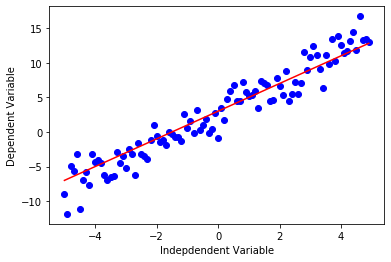

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

#### Cubic

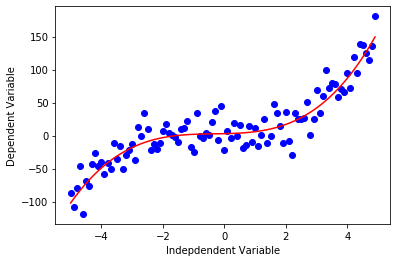

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

#### Cuadratic

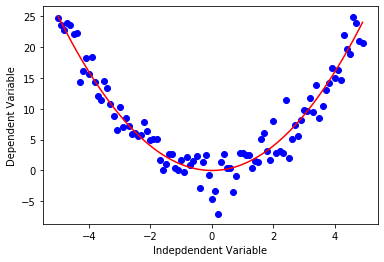

In [5]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

#### Exponential

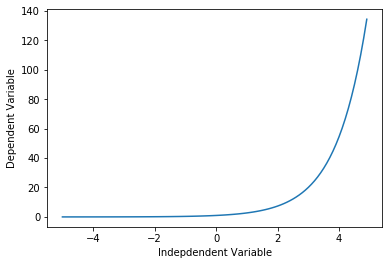

In [6]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

#### Logarithmic

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


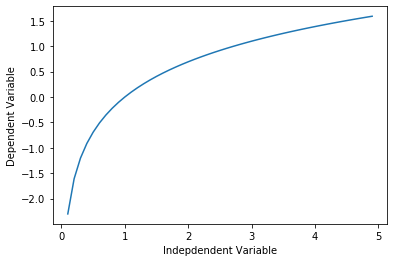

In [7]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

#### Sigmoidal or Logistic

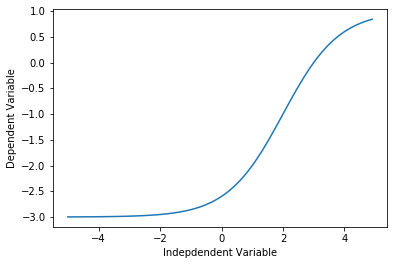

In [8]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

#### Practice

In [ ]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

*Which sentence is NOT TRUE about "Polynomial Regression"?*
- Polynomial regression fits a curve line to your data.
- Quadratic and cubic regression lines are a type polynomial regression
- **A polynomial regression model cannot be expressed as linear regression**
- Polynomial regression models can fit using the method of least squares

*Basically, there are two applications for multiple linear regression:*
- First, it can be used when we would like to identify the strength of the effect that the independent variables have on the dependent variable.
- Second, it can be used to predict the impact of changes, that is, to understand how the dependent variable changes when we change the independent variables.

**Classification** algorithms in machine learning
- Decision Trees (ID3, C4.5, C5.0)
- Naïve Bayes
- Linear Discriminant Analysis
- k-Nearest Neighbor
- Logistic Regression
- Neural Networks
- Support Vector Machines (SVM)

The **K-Nearest Neighbors (KNN)** algorithm:
1. Pick a value for K
2. Calculate the distance of unknown case from all cases
3. Select the K-observations in the training data are "nearest" to the unknown data point
4. Predict the response of the unknow data point using the most popular response value from the K-nearest neighbors

*How can we find the best value for K?*

The general solution is to reserve a part of your data for testing the accuracy of the model. Once you've done so, choose K equals one and then use the training part for modeling and calculate the accuracy of prediction using all samples in your test set. Repeat this process increasing the K and see which K is best for your model.

#### Evaluation Metrics in Classification

- Jaccard index
- F1-score
- Log Loss

### Jaccard index or Jaccard similarity coefficient

If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

### Confusion Matrix (True label, Predicted label)
- TP: True Positives (1, 1) 
- FN: False Negatives (1, 0)
- FP: False Positives (0, 1)
- TN: True Negatives (0, 0)

### F1-score

**Precision** is a measure of the accuracy, provided that a class label has been predicted.

Precision (prc) = TP / (TP + FP)

**Recall** is the true positive rate

Recall (rec) = TP / (TP + FN)

The **F1-score** is the harmonic average of the precision and recall, where an F1-score reaches its best value at 1 (which represents perfect precision and recall) and its worst at 0. It is a good way to show that a classifier has a good value for both recall and precision

F1-score = 2x (prc x rec) / (prc + rec)

### Logarithmic loss or Log loss 

When the output of a classifier is the probability of a class label, instead of the label
Performance of a classifier where the predicted output is a probability value between 0 and 1
That more ideal classifiers have progressively smaller values of log loss. So, the classifier with lower log loss has better accuracy.

*Which one is the more ideal classifier?*
- **The classifier with F1-score close to one**
- The classifier with LogLoss close to one
- The classifier with Jaccard-index close to zero

### Practice

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

y = df['custcat'].values
y[0:5]

#Normalize Data

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

#Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#Classification: K nearest neighbor (KNN) - Import library

from sklearn.neighbors import KNeighborsClassifier

#Training

k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

#Predicting

yhat = neigh.predict(X_test)
yhat[0:5]

#Accuracy evaluation: This function is equal to the jaccard_similarity_score function.
#Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

#K=6

k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

#k=10 Confusion Matriz

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

#Plot model accuracy for Different number of Neighbors

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

### Decision Tree

*Which of the following sentences is NOT TRUE about Decision Tree?*
- **A Decision Tree is a type of clustering approach that can predict the class of a group, for example, DrugA or DrugB.**
- Decision Trees are built by splitting the training set into distinct nodes
- One node in a Decision Tree contains all of or most of, one category of the data.

#### Decision tree learning algorithm
1. Choose an attribute from your dataset.
2. Calculate the significance of attribute in splitting the data.
3. Split the data based on the value of the best attribute
4. Go to step 1.

Which attribute is the best?
- More **predictiveness**
- Less **impurity**
- Lower **entropy**

**Entropy:** Measure of ranfomness or uncertainty

*What is the meaning of Entropy in Decision Tree?*\
The entropy in a node is the amount of information disorder calculated in each node.

Entropy = -p(a)log(p(A))-p(B)log(B))

*The lower the Entropy, the less uniform the distribution, the purer the node.*

*Example:*\
Drug A = 5\
Drug B = 9

S:[9 B, 5 A]\
E = -(9/14)log(9/14) - (5/14)log(5/14)\
E = 0.940

1. Attribute = Sex\
Female: [3 B, 4 A]\
E = 0.985\
Male: [6 B, 1 A]\
E = 0.592

2. Attribute = Cholesterol\
Normal: [6 B, 2 A]\
E = 0.811\
High: [3 B, 3 A]\
E = 1.00

*Which attribute is the best?*\
The tree with the higher **Information Gain** after splitting.

**Information gain** is the information that can increase the level of certainty after splitting.

Information gain = (Entropy before split) - (weighted entropy after split)\
*Lower Weigted Entropy, More Information Gain*

Gain (s, Sex)\
= 0.940 - [(7/14)0.985 + (7/14)0.592]\
= 0.151

Gain (s, Cholesterol)\
= 0.940 - [(8/14)0.811 + (6/14)1.0]\
= 0.048

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#Pre-processing

X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

#Transform

from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

#Setting up the Decision Tree

from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

#Modeling

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

drugTree.fit(X_trainset,y_trainset)

#Prediction

predTree = drugTree.predict(X_testset)

print (predTree [0:5])
print (y_testset [0:5])

#Evaluation

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

### Logistic Regression Training

#### Minimizing the cost function of the model

*How too find the best parameters for our model?*\
Minimize the cost function

*How to minimize the cost function?*\
Using Gradiente Descent

*What is gradient descent?*\
A technique to use the derivate of a cost funnction to chance the parameter values, in order to minimize the cost.

#### Training algorithm recap:
1. Initialize the parameter ramdomly.
2. Feed the cost function with training set, and calculate the error.
3. Calculate the gradient of cost function.
4. Update weights with new values.
5. Go to step 2 until cost is small enough.
6. Predict the new customer X.

In [ ]:
#Practice

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

#Load Data From CSV File

churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

#Data pre-processing and selection

churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

#How many rows and columns are in this dataset in total? What are the name of columns?

churn_df.shape

#Lets define X, and y for our dataset:

X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

y = np.asarray(churn_df['churn'])
y [0:5]

#we normalize the dataset:

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

#we split our dataset into train and test set:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#Modeling (Logistic Regression with Scikit-learn)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

#Now we can predict using our test set:

yhat = LR.predict(X_test)
yhat

#predict_proba returns estimates for all classes, ordered by the label of classes.
#So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

yhat_prob = LR.predict_proba(X_test)
yhat_prob

#Evaluation

#Jaccard Index

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

#Another way of looking at accuracy of classifier is to look at confusion matrix.

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
​
    print(cm)
​
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
​
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
​
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

#log loss

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

#Try to build Logistic Regression model again for the same dataset, but this time,
#use different __solver__ and __regularization__ values? What is new __logLoss__ value?

LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

### Support Vector Machine (SVM)

SVM is a supervised algorithm that classifies cases by finding a separator:
1. Mapping data to a high-dimensional feature space.
2. Finding a separator.

The **hyperplane** is a line dividing a plane into two parts where each class lays on either side. Now we can use this line to classify new cases. Basically, mapping data into a higher-dimensional space is called, **kernelling**. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as *linear*, *polynomial*, *Radial Basis Function (RBF)*, and *sigmoid*.
 
One reasonable choice as the **best hyperplane** is the one that represents the largest separation or margin between the two classes. So the goal is to choose a hyperplane with as big a margin as possible. Examples closest to the hyperplane are support vectors. We tried to find the hyperplane in such a way that it has the maximum distance to support vectors.

**Advantages:**
1. they're accurate in high-dimensional spaces.
2. And they use a subset of training points in the decision function called, support vectors, so it's also memory efficient.

**Disadvantages:**
1. the algorithm is prone for over-fitting if the number of features is much greater than the number of samples.
2. SVMs do not directly provide probability estimates
3. Are not very efficient computationally if your dataset is very big, such as when you have more than 1,000 rows.

*in which situation should I use SVM?*
- Image recognition
- Text category assigment
- Detection spam
- Sentiment analysis
- Gene Expression Classification
- Regression, outlier detection and clustering

In [ ]:
#Practice

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

#Load Data From CSV File

cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

#Lets look at the distribution of the classes based on Clump thickness and Uniformity of cell size:

ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

#Data pre-processing and selection

cell_df.dtypes

#It looks like the BareNuc column includes some values that are not numerical. We can drop those rows:

cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

#We want the model to predict the value of Class (that is, benign (=2) or malignant (=4)).
#As this field can have one of only two possible values, we need to change its measurement level to reflect this.

cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

#Train/Test dataset

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#Modeling (SVM with Scikit-learn)

#Let's just use the default, RBF (Radial Basis Function) for this lab.

from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

#After being fitted, the model can then be used to predict new values:

yhat = clf.predict(X_test)
yhat [0:5]

#Evaluation

from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
​
    print(cm)
​
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
​
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
​
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)
​
print (classification_report(y_test, yhat))
​

# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

#You can also easily use the f1_score from sklearn library:

from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

#Lets try jaccard index for accuracy:

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

#Can you rebuild the model,
#but this time with a __linear__ kernel? You can use __kernel='linear'__ option, when you define the svm.

clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))

#### Clustering vs. Classification

| Classification | Clustering |
| :---: | :---: |
| Labeled dataset | Unlabeled dataset |
| Modelling Dession Tree | Modelling K-Means |
| Prediction | Segmentation |

*Why clustering?
- exploratory data analysis
- summary generation or reducing the scale
- outlier detection- especially to be used for fraud detection or noise removal
- finding duplicates and datasets or as a pre-processing step for either prediction
- other data mining tasks or as part of a complex system.


#### Different clustering algorithms and their characteristics:
- Partitioned-based clustering is a group of clustering algorithms that produces fear like clusters, such as; K-Means, K-Medians or Fuzzy c-Means. These algorithms are relatively efficient and are used for medium and large sized databases.
- Hierarchical clustering algorithms produce trees of clusters, such as agglomerative and divisive algorithms. This group of algorithms are very intuitive and are generally good for use with small size datasets.
- Density-based clustering algorithms produce arbitrary shaped clusters. They are especially good when dealing with spatial clusters or when there is noise in your data set. For example, the DB scan algorithm.

#### K-Means algorithms:
- Partitioning clustering
- K-means divides the data into **non-overlapping** subsets (clusters) without any cluster-internal structure.
- Examples within a cluster are very similar.
- Examples across different clusters are very different or dissimilar.

#### Determine the similarity or dissimilarity:
- Intra-cluster distances are minimized.
- Inter-cluster distances are maxamized.

#### K-Means clustering
1. Initialize k=3 centroids ramdomly.
2. Calculate the distance (Distance Matrix).
3. Assign each point to the closest centroid.
4. Compute the new centroids for each cluster.
5. Repet until there are no more changes (It results in the clusters with minimum error or the most dense clusters).

*K-Means accuracy - internal approach (how bad each cluster is):*
- Average the distance between data points within a cluster.
- Also, average of the distances of data points from their cluster centroids can be used as a metric of error for the clustering algorithm. Which indicate how dense our clusters are or, to what extent we minimize the error of clustering.

*Then, looking at the change of this metric, we can find the best value for K.*

But the problem is that with increasing the number of clusters, the distance of centroids to data points will always reduce. This means increasing K will always decrease the error. So, the value of the metric as a function of K is plotted and the **elbow point** is determined where the rate of decrease sharply shifts. It is the right K for clustering. This method is called the **elbow method**.

So let's recap k-Means clustering - k-Means is a partition-based clustering which is
- relatively efficient on medium and large sized data sets.
- produces sphere-like clusters because the clusters are shaped around the centroids.
- its drawback is that we should pre-specify the number of clusters, and this is not an easy task.

In [1]:
#Practice

import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
np.random.seed(0)

In [3]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

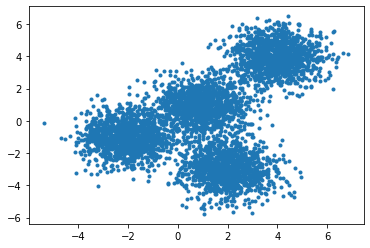

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [5]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [6]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 3, 0, 0])

In [8]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687]])

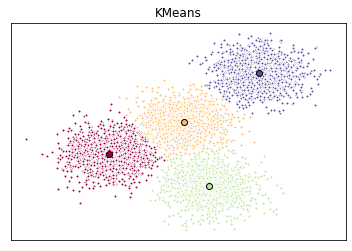

In [9]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

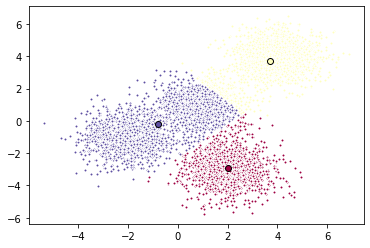

In [10]:
#Try to cluster the above dataset into 3 clusters

k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

In [ ]:
#Practice 2

#Load Data From CSV File

import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

#Pre-processing

df = cust_df.drop('Address', axis=1)
df.head()

#Normalizing over the standart desviation

from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

#Modeling

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

#We assign the labels to each row in dataframe.

df["Clus_km"] = labels
df.head(5)

#We can easily check the centroid values by averaging the features in each cluster.

df.groupby('Clus_km').mean()

#Now, lets look at the distribution of customers based on their age and income:

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

#3D plot

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

### Hierarchical Clustering

**Hierarchical clustering** algorithms build a hierarchy of clusters where each node is a cluster consisting of the clusters of its daughter nodes.

Strategies for hierarchical clustering generally fall into two types:
- Divisive is top down, so you start with all observations in a large cluster and break it down into smaller pieces.
- Agglomerative is bottom up, where each observation starts in its own cluster and pairs of clusters are merged together as they move up the hierarchy.

*The agglomerative approach is more popular among data scientists*

#### Agglomerative algorith:
1. Create *n* clusters, one for each data point.
2. Compute the Proximity Matrix.
3. Repet:\
    i. Merge the two closest clusters.\
    ii. Update the proximity matrix.
4. Until only a single cluster remains.

#### Distance between clusters

**Single-Linkage Clustering:** Minimum distance between clusters.\
**Complete-Linkage Clustering:** Maximum distance between clusters.\
**Average Linkage Clustering:** Average distance between clusters.\
**Centroid Linkage Clustering:** Distance between cluster centroids.

*In which type of dissimilarity calculation between clusters, we find the longest distance between points in each cluster?*\
Complete-Linkage Clustering

| Advantages | Disadvantages |
| :---: | :---: |
| Doesn't required number of clusters to be specified | Can never undo any previous steps throughout the algorithm |
| Easy to implement | Generally has long runtimes |
| Produces a dendrogram, which helps with understanding the data | Sometimes difficult to identify the number of clusters by the dendrogram |

| k-means | Hierarchical Clustering |
| :---: | :---: |
| Much more efficient | Can be slow for large datasets |
| Requires the number of clusters to be specified | Does not requiere the number of clusters to run |
| Gives only one partitioning of the data based on the predefined number of clusters | Gives more than one partitioning depending on the solution |
| Potentially retunrs different clusters each time it is run due to random initialization of centroids | Always generates the same clusters |

In [1]:
#Practice

import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

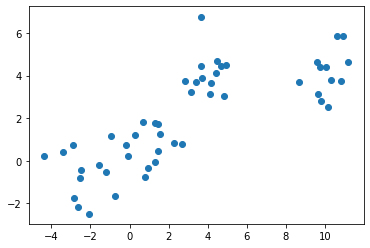

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

In [4]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [5]:
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

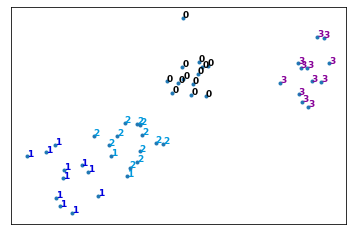

In [6]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [7]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.43656232 0.42196052 ... 0.50928179 0.63714465 0.1279007 ]
 [0.43656232 0.         0.69311175 ... 0.11884694 0.20847037 0.56443603]
 [0.42196052 0.69311175 0.         ... 0.69568127 0.8313082  0.39908804]
 ...
 [0.50928179 0.11884694 0.69568127 ... 0.         0.13816497 0.63464496]
 [0.63714465 0.20847037 0.8313082  ... 0.13816497 0.         0.76413051]
 [0.1279007  0.56443603 0.39908804 ... 0.63464496 0.76413051 0.        ]]


In [8]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


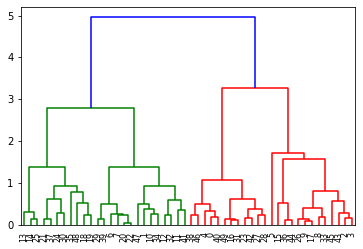

In [9]:
dendro = hierarchy.dendrogram(Z)

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


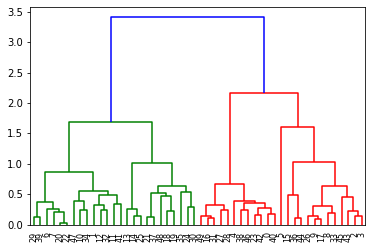

In [10]:
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

### DBSCAN

| k-means | Density-based clustering |
| :---: | :---: |
| k-means assigns all points to a cluster even if they do not belong in any | Density-based clustering locates regions of **high density**, and separates outliers |

*Which of the following are the characteristics of density-based clustering?*
- **Density-based clustering algorithms locate regions of high density that are separated from one another by regions of low density.**
- **Density-based clustering algorithms are proper for arbitrary shape clusters.**
- Density-based clustering algorithms have no notion of outliers.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

It works based on two parameters: R (Radius of neighborhood) and M (Minimum number of neighborhood).
- R determines a specified radius that if it includes enough points within it, we call it a dense area.
- M determines the minimum number of data points we want in a neighborhood to define a cluster. Let's define radius as two units.

Advantages of DBSCAN:
1. Arbitrarily shaped clusters
2. Robust to outliers
3. Does not require specification of the number of clusters

In [12]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

In [13]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

In [14]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

In [15]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [16]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [17]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [18]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

In [19]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

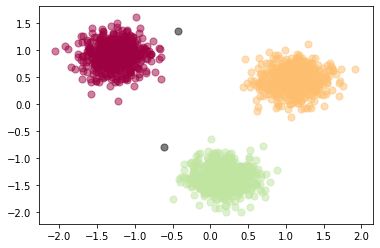

In [20]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


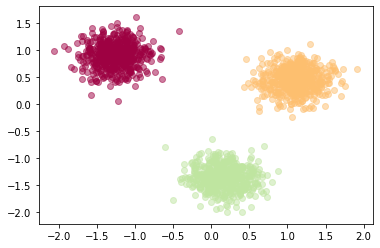

In [21]:
from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()

### Recommender Systems

*What is a "Content-based" recommender system?*\
Content-based technique tries to figure out what a user's favourite aspects of an item is, and then recommends items that present those aspects.

#### Implementing recommender systems

1. Memory-based:
    - Uses the entire user-item dataset to generate a recommendation
    - Uses statistical techniques to approximate users or items e.g., Pearson Correlation, Cosine Similarity, Euclidean Distance, etc.

2. Model-based:
    - Develops a model of users in an attempt to learn their preferences
    - Models can be created using ML techniques like regression, clustering, classification, etc.

In [ ]:
#Practice

#Dataframe manipulation library
import pandas as pd
#Math functions, we'll only need the sqrt function so let's import only that
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Storing the movie information into a pandas dataframe
movies_df = pd.read_csv('movies.csv')
#Storing the user information into a pandas dataframe
ratings_df = pd.read_csv('ratings.csv')
#Head is a function that gets the first N rows of a dataframe. N's default is 5.
movies_df.head()

#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())
movies_df.head()

#Every genre is separated by a | so we simply have to call the split function on |
movies_df['genres'] = movies_df.genres.str.split('|')
movies_df.head()

#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
moviesWithGenres_df = movies_df.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in movies_df.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()

ratings_df.head()

#Drop removes a specified row or column from a dataframe
ratings_df = ratings_df.drop('timestamp', 1)
ratings_df.head()

userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

#Filtering out the movies by title
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('genres', 1).drop('year', 1)
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies

#Filtering out the movies from the input
userMovies = moviesWithGenres_df[moviesWithGenres_df['movieId'].isin(inputMovies['movieId'].tolist())]
userMovies

#Resetting the index to avoid future issues
userMovies = userMovies.reset_index(drop=True)
#Dropping unnecessary issues due to save memory and to avoid issues
userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
userGenreTable

inputMovies['rating']

#Dot produt to get weights
userProfile = userGenreTable.transpose().dot(inputMovies['rating'])
#The user profile
userProfile

#Now let's get the genres of every movie in our original dataframe
genreTable = moviesWithGenres_df.set_index(moviesWithGenres_df['movieId'])
#And drop the unnecessary information
genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
genreTable.head()

genreTable.shape

#Multiply the genres by the weights and then take the weighted average
recommendationTable_df = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df.head()

#Sort our recommendations in descending order
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)
#Just a peek at the values
recommendationTable_df.head()

#The final recommendation table
movies_df.loc[movies_df['movieId'].isin(recommendationTable_df.head(20).keys())]

### Advantages and Disadvantages of Content-Based Filtering

##### Advantages
* Learns user's preferences
* Highly personalized for the user

##### Disadvantages
* Doesn't take into account what others think of the item, so low quality item recommendations might happen
* Extracting data is not always intuitive
* Determining what characteristics of the item the user dislikes or likes is not always obvious

*Which one is correct about user-based and item-based collaborative filtering?*
- **In user-based approach, the recommendation is based on users of the same neighborhood, with whom he/she shares common preferences.**
- In item-based approach, the recommendation is based on profile of a user that shows interest of the user on specific item.

### Challenges of collaborative filtering

**Data Sparsity:** Users in general rate only a limmited number of items.\
**Cold star:** Difficult in recommendation to new users or new items.\
**Scalability:** Increase in number of users or items.

In [ ]:
#Practice

#Dataframe manipulation library
import pandas as pd
#Math functions, we'll only need the sqrt function so let's import only that
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Storing the movie information into a pandas dataframe
movies_df = pd.read_csv('movies.csv')
#Storing the user information into a pandas dataframe
ratings_df = pd.read_csv('ratings.csv')

#Head is a function that gets the first N rows of a dataframe. N's default is 5.
movies_df.head()

#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())

movies_df.head()

#Dropping the genres column
movies_df = movies_df.drop('genres', 1)

movies_df.head()

ratings_df.head()

#Drop removes a specified row or column from a dataframe
ratings_df = ratings_df.drop('timestamp', 1)

ratings_df.head()

#Practice 2

userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

#Filtering out the movies by title
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('year', 1)
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies

#Filtering out users that have watched movies that the input has watched and storing it
userSubset = ratings_df[ratings_df['movieId'].isin(inputMovies['movieId'].tolist())]
userSubset.head()

#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['userId'])

userSubsetGroup.get_group(1130)

#Sorting it so users with movie most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

userSubsetGroup[0:3]

userSubsetGroup = userSubsetGroup[0:100]

#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0

pearsonCorrelationDict.items()

pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

topUsersRating=topUsers.merge(ratings_df, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

movies_df.loc[movies_df['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]